---

## ***Compass neurons***

[Link to the paper](./ring_attractor.pdf)

The equation of a ring attractor is shown below.

<center>$ \tau\displaystyle\frac{\partial f_n}{\partial t} = -f_n+\bigg[  \alpha f_n + D( f_{n+1}+ f_{n-1} -2f_n) - \beta \sum_{m=0}^{N-1}f_m +1 \bigg]_+$ </center>

$f_n$ is the activity of a compass neuron with an index, $n$<br>
$N=32$ is the number of compass neurons (i.e, there are 32 similar equations)<br>
$ [x]_+ $ is a rectification function (that is, if $x<0$, it becomes zero).<br>
$\tau = 0.05$ is a decay time constant (if there is no input, the neuron's activity decays)<br>
$\alpha = 2.62$ is the strength of self-recurrent connection<br>
$\beta = 1.96$ is the strength of uniform inhibition<br>
$D=5.19$ is the strength of recurrent excitation between neighboring compass neurons<br>
The constant term $1$ is a uniform excitatory drive that generates activity in the system.<br>
The initial value of $f_n$ can be set `yinit = np.random.random(size=(32))*0.08`<br>



In [93]:
import numpy as np
from scipy.integrate import solve_ivp

def RingAttractorODEs(t,f):
    
    tau = 0.05
    alpha = 2.6183
    beta = 1.9635
    D = 5.1876
    n_neurons = 32;
    
    #f_np1 = f[  list(range(1,n_neurons)) + [0]   ]
    #f_nm1 = f[  [-1] + list(range(n_neurons-1))  ]
    #tmp = alpha*f + D*(f_np1+f_nm1-2*f) - beta*sum(f)  + 1
    
    tmp = alpha*f + D*(np.roll(f,-1) + np.roll(f,1) - 2*f) - beta*f.sum()  + 1 
    tmp[tmp<0] = 0
    
    dfdt = (  -f + tmp )/tau
    
    return dfdt

In [98]:
tspan = np.linspace(0, 1, 100)
f_init = np.random.random(size=(32,))*0.08

sol = solve_ivp(RingAttractorODEs,
                [tspan[0], tspan[-1]], f_init, t_eval=tspan)

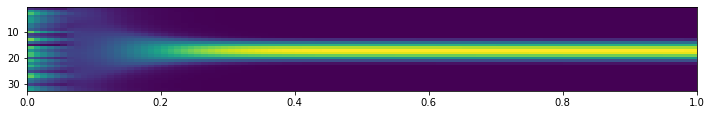

In [99]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(12,10))
plt.imshow(sol.y, extent=[0,tspan[-1],32.5,0.5], aspect=tspan[-1]/32/8)
